# GROUP 7 - PROJECT 1 - Python




## FWL Theorem proof

The FWL Theorem demostrates a property of the OLS regression method.
Suppose that for a given $Y$ dependent variable we have an explanatory variable $D$
and another subset of $k$ explanatory variables grouped in $X$. 
We will focus just in the  first subset of explanatory variables and we'll take the second subset as 
auxiliary variables. 

$$
\begin{align}
\ Y &= D \beta_{D}    + X  \beta_{X}  + \epsilon \\
\end{align}
$$

If we then regress  (1) via OLS we would obtain: 

$$
\begin{align}
\ \hat{Y} &= D \hat{\beta_{D}}    + X  \hat{\beta_{X}}  + \hat{\epsilon}
\end{align}
$$

Then consider the following regression equations and the corresponding regression  estimates.

$$
\begin{align}
\ Y &= X \beta_{xy}   + \epsilon_{xy} \\
\ \tilde{Y} &=  X \hat{\beta_{xy}}   + \hat{\epsilon_{xy}} \\
\ D &= X \beta_{xd}   + \epsilon_{xd} \\
\ \tilde{D} &= X \hat{\beta_{xd}}   + \hat{\epsilon_{xd}} \\
\ \epsilon_{xy} =  \epsilon_{xd} \delta + u_i \\
\ \hat{\epsilon_{xy}} = \hat{\epsilon_{xd}} \hat{\delta} + \hat{u_i} \\
\end{align}
$$


The FWL Theorem states that for a given population, the parameter $\beta_1$ obtained in (1) is the same parameter as the $\delta$ in (7).
 Consequently,
the estimators $\hat{\beta_{1}}$ and $\hat{\delta}$ will converge to the same value.


We can prove this by the following steps. 
***
#### Proof


Replacing regressions (3) and (5) on (1) we obtain:

$$
\begin{align}
\ \epsilon_{xy} = (X \beta_{xd}   + \epsilon_{xd}) \beta_{D}    + X  (\beta_{X} - \beta_{xy})  + \epsilon  
\end{align}
$$

Where the property of the OLS method states that $error$ isn't correlated with the explanatory variables 


$$
\begin{align}
\  corr(\epsilon_{xy}, X) = 0  {\space} ; corr(\epsilon , X) = 0  
\end{align}
 $$

Consequently, there's a second property that arises
. This property stands that if some explanatory variable is not correlated with the dependent variable the coefficient of the explanatory variable will be 0. 


Then (9) can be expressed as.

$$
\begin{align}
\ \epsilon_{xy} = \epsilon_{xd} \beta_{D}    + \epsilon  
\end{align}
$$

We note that the expression (10) is the same as (7). Therefore  $\beta_{D}$ = $\delta$ and $ \epsilon $ = $u_i$.

***

#### References
<a id="1">[1]</a> 
Lovell, M. (2007). 
A Simple Proof of the FWL (Frisch-Waugh-Lovell) Theorem. Wesleyan University.

## Importing Data

In [3]:
import pandas as pd
import numpy as np
import pyreadr
import math
import os
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [4]:
rdata_read = pyreadr.read_r("data/wage2015_subsample_inference.Rdata")
data = rdata_read[ 'data' ]
data.shape

(5150, 20)

## Data analysis
For this project, we select the cases of the subset of college-educated workers, including those who have some college education or are college graduates (scl, clg variables respectively).

In [5]:
# Selecting sample
data_ed=data[(data[ 'scl' ] == 1)|(data['clg']==1) ]
Z_ed = data_ed[ ["lwage","sex","shs","hsg","scl","clg","ad","ne","mw","so","we","exp1"] ]

Z = data[ ["lwage","sex","shs","hsg","scl","clg","ad","ne","mw","so","we","exp1"] ]

# Comparing the sample means
data_scl=data[data[ 'scl' ] == 1 ]
Z_scl = data_scl[ ["lwage","sex","shs","hsg","scl","clg","ad","ne","mw","so","we","exp1"] ]

data_clg=data[data['clg']==1]
Z_clg=data_clg[ ["lwage","sex","shs","hsg","scl","clg","ad","ne","mw","so","we","exp1"] ]

table = np.zeros( (12, 3) )
table[:, 0] = Z.mean().values
table[:, 1] = Z_scl.mean().values
table[:, 2] = Z_clg.mean().values
table_pandas = pd.DataFrame( table, columns = [ 'All', 'Some College', 'College Graduate'])
table_pandas.index = ["Log Wage","Sex","Less then High School","High School Graduate","Some College","Gollage Graduate","Advanced Degree", "Northeast","Midwest","South","West","Experience"]

table_pandas

,All,Some College,College Graduate
Log Wage,2.970787,2.847335,3.133670
Sex,0.444466,0.453911,0.485941
Less then High School,0.023301,0.000000,0.000000
High School Graduate,0.243883,0.000000,0.000000
Some College,0.278058,1.000000,0.000000
Gollage Graduate,0.317670,0.000000,1.000000
Advanced Degree,0.137087,0.000000,0.000000
Northeast,0.227767,0.186453,0.261614
Midwest,0.259612,0.305866,0.231051
South,0.296505,0.282123,0.289120


The table above shows that the difference in average _logwage_ between workers with some college education and workers who are college graduates is equal to $0.2863$. This means that, for our sample, non college gradutes tend to earn less than college graduates.

In [6]:
data_scl['lwage'].mean() - data_clg['lwage'].mean()

-0.2863352099445877

This unconditional (predictive) effect of college education equals the coefficient $\beta$ in the univariate ols regression of $Y$ on $D$:

\begin{align}
\log(Y) &=\beta D + \epsilon.
\end{align}

We verify this by running and OLS regression:

In [7]:
nocontrol_model = smf.ols( formula = 'lwage ~ scl', data = data_ed )
nocontrol_est = nocontrol_model.fit().summary2().tables[1]['Coef.']['scl']
HCV_coefs = nocontrol_model.fit().cov_HC0
nocontrol_se = np.power( HCV_coefs.diagonal() , 0.5)[1]

print( f'The estimated education coefficient is {nocontrol_est} and the corresponding robust standard error is {nocontrol_se}' )

The estimated education coefficient is -0.286335209944589 and the corresponding robust standard error is 0.019018119623101855


## OLS regression with control variables
We run an OLS regression of $Y$ on $(D,W)$ to control for the effect of covariates summarized in $W$:

\begin{align}
\log(Y) &=\beta_1 D  + \beta_2' W + \epsilon.
\end{align}

Where $W$ controls for experience, gender, region, and occupation and industry indicators plus transformations and two-way interactions.

In [8]:
flex = 'lwage ~ scl + (exp1+exp2+exp3+exp4)*(sex+occ2+ind2+mw+so+we)'

control_model = smf.ols( formula = flex, data = data_ed )
control_est = control_model.fit().summary2().tables[1]['Coef.']['scl']

print(control_model.fit().summary2().tables[1])
print( f"Coefficient for OLS with controls {control_est}" )

HCV_coefs = control_model.fit().cov_HC0
control_se = np.power( HCV_coefs.diagonal() , 0.5)[1]

               Coef.  Std.Err.          t         P>|t|    [0.025    0.975]
Intercept   3.239591  0.319180  10.149718  8.427624e-24  2.613742  3.865440
occ2[T.10]  0.078203  0.243029   0.321784  7.476402e-01 -0.398329  0.554734
occ2[T.11] -0.515940  0.435346  -1.185126  2.360669e-01 -1.369566  0.337687
occ2[T.12]  0.197823  0.341278   0.579654  5.621942e-01 -0.471354  0.867000
occ2[T.13] -0.214635  0.272114  -0.788767  4.303139e-01 -0.748196  0.318926
...              ...       ...        ...           ...       ...       ...
exp3:we    -0.256857  0.184872  -1.389381  1.648260e-01 -0.619354  0.105639
exp4:sex    0.021027  0.018449   1.139711  2.545027e-01 -0.015148  0.057201
exp4:mw     0.019739  0.025944   0.760825  4.468249e-01 -0.031132  0.070610
exp4:so     0.001085  0.022631   0.047956  9.617544e-01 -0.043290  0.045460
exp4:we     0.031859  0.023916   1.332097  1.829353e-01 -0.015036  0.078755

[231 rows x 6 columns]
Coefficient for OLS with controls -0.23666315881470074


The estimated regression coefficient $\beta_1\approx-0.2366$ measures how our linear prediction of wage changes if we set the college education variable $D$ from 0 (the worker is a college graduate) to 1 (the worker has completed some college education, but is not a college graduate), holding the control variables in $W$ fixed. We  see that the unconditional wage gap of $28.63$% for education decresases to $23.67$% after controlling for worker characteristics.

## Partialling-Out using OLS

Using the partialling-out method we expect to obtain the same estimator $\beta_1$ that we got in the OLS regression with control variables.

In [9]:
# models
# model for Y
flex_y = 'lwage ~ (exp1+exp2+exp3+exp4)*(sex+occ2+ind2+mw+so+we)'
# model for D
flex_d = 'scl ~ (exp1+exp2+exp3+exp4)*(sex+occ2+ind2+mw+so+we)' 

# partialling-out the linear effect of W from Y
t_Y = smf.ols( formula = flex_y , data = data_ed ).fit().resid

# partialling-out the linear effect of W from D
t_D = smf.ols( formula = flex_d , data = data_ed ).fit().resid

data_res = pd.DataFrame( np.vstack(( t_Y.values , t_D.values )).T , columns = [ 't_Y', 't_D' ] )
# regression of Y on D after partialling-out the effect of W
partial_fit =  smf.ols( formula = 't_Y ~ t_D' , data = data_res ).fit()
partial_est = partial_fit.summary2().tables[1]['Coef.']['t_D']

print("Coefficient for D via partialling-out", partial_est)

# standard error
HCV_coefs = partial_fit.cov_HC0
partial_se = np.power( HCV_coefs.diagonal() , 0.5)[1]

# confidence interval
partial_fit.conf_int( alpha=0.05 ).iloc[1, :]

Coefficient for D via partialling-out -0.23666315881469685


0   -0.274441
1   -0.198885
Name: t_D, dtype: float64

The estimated coeficient for $D$ via partialling-out is equal to the coefficient $\beta_1$ estimated with the OLS regression, after controlling for the effects of the variables contained in $W$.

## Graph

In this section, we present graphics that explain the behavior of the variables studied in the former regressions.

In [10]:
resultnc=smf.ols( formula = 'lwage ~ scl', data = data_ed ).fit()
resultc =smf.ols( formula = flex, data = data_ed ).fit()


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [12]:
data_graph=pd.DataFrame(data_ed, columns=['lwage','exp1','scl','clg','result_control', 'result_nocontrol'])
data_graph['result_control']=resultc.fittedvalues
data_graph['result_nocontrol']=resultnc.fittedvalues

dncol=data_graph[data_graph['scl']==1]
dcol=data_graph[data_graph['clg']==1]

Now, we plot the regressions we found previously, that is, the estimated log wages, compared to the original data.

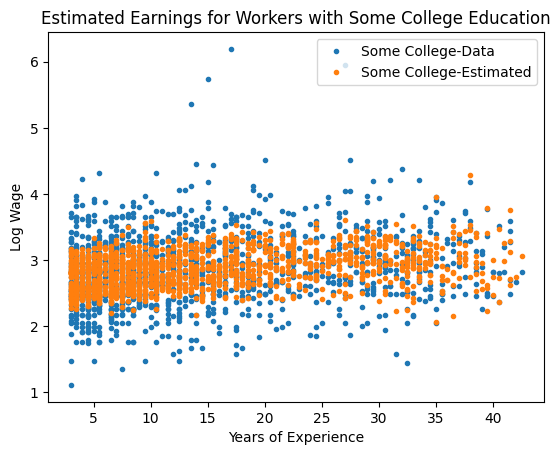

In [17]:
# Mixed Graph
plt.plot(dncol['exp1'],dncol['lwage'],'.', label='Some College-Data')
plt.plot(dncol['exp1'],dncol['result_control'],'.', label='Some College-Estimated')
plt.legend(loc='best')
plt.xlabel('Years of Experience')
plt.ylabel('Log Wage')
plt.title('Estimated Earnings for Workers with Some College Education')
plt.show()

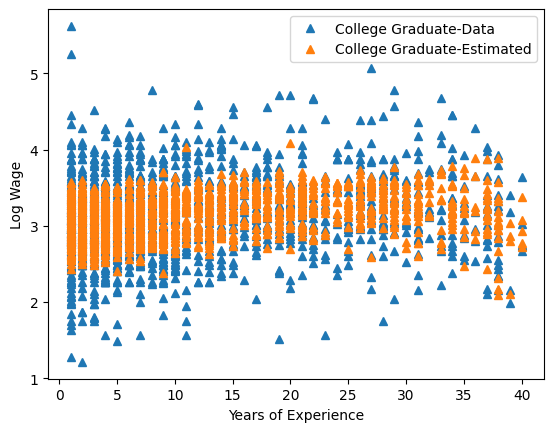

In [15]:
plt.plot(dcol['exp1'],dcol['lwage'],'^', label='College Graduate-Data')
plt.plot(dcol['exp1'],dcol['result_control'],'^', label='College Graduate-Estimated')
plt.legend(loc='best')
plt.xlabel('Years of Experience')
plt.ylabel('Log Wage')
plt.title('Estimated Earnings for College Graduates')
plt.show()

To better see how the regression fits the data, we present two graphics that contrast the means of the raw data, and the estimations. We can observe that college graduates tend to earn more than those workers with only some college education.  

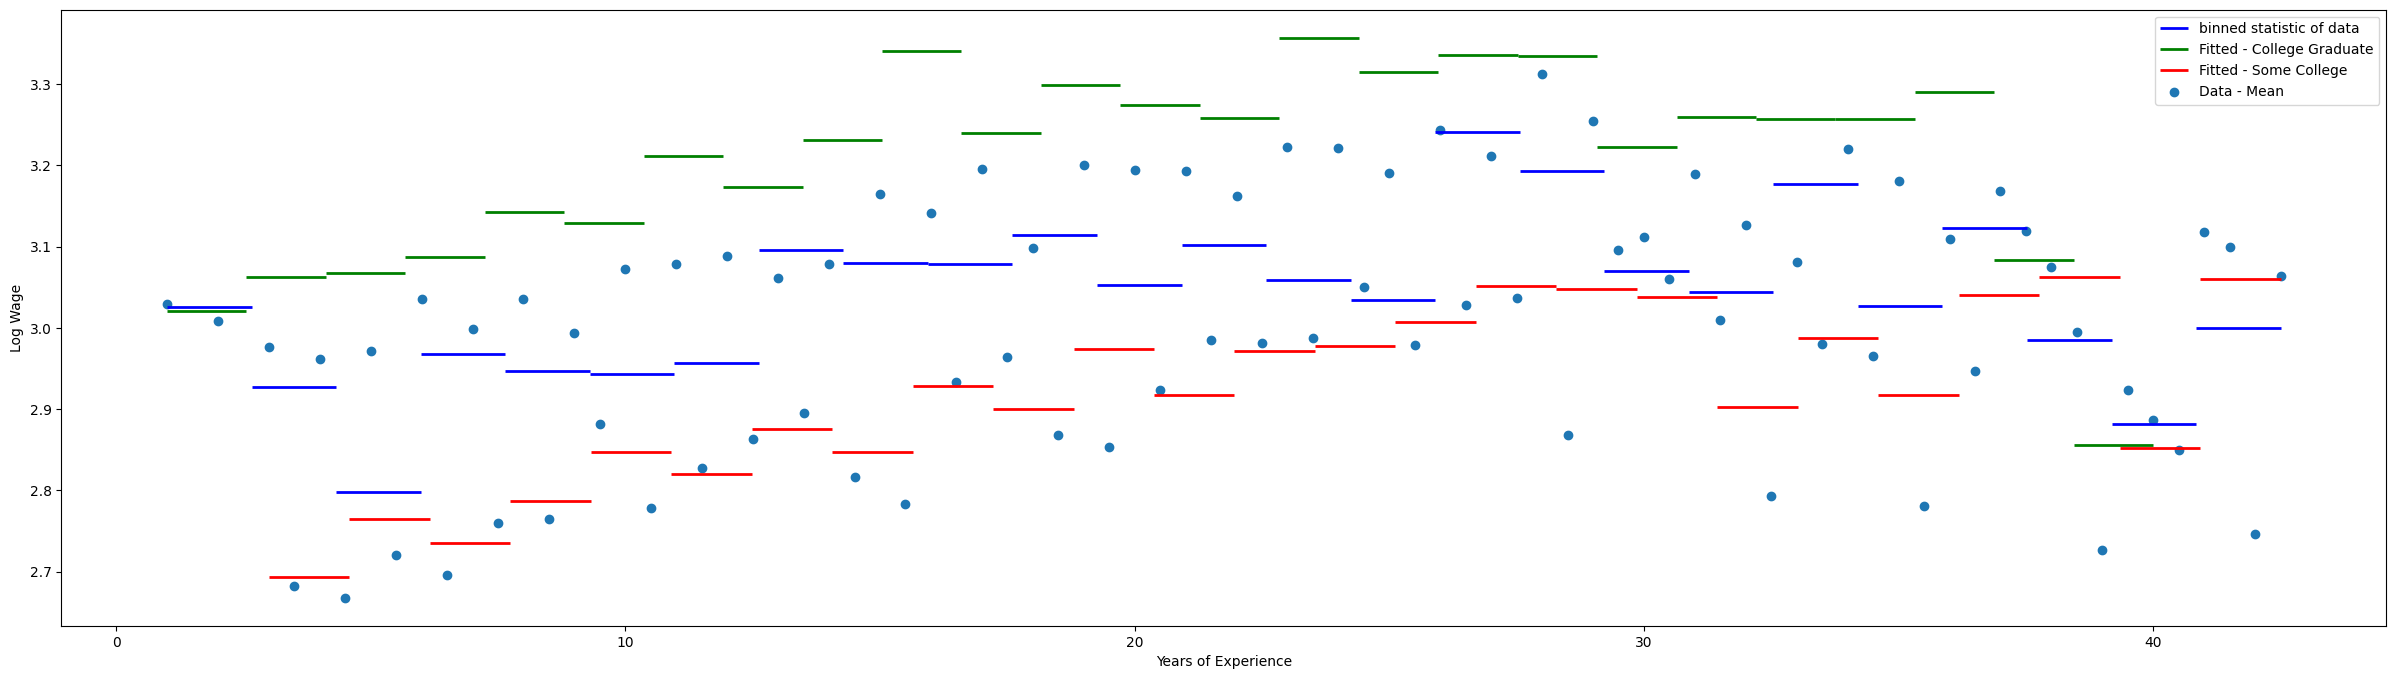

In [24]:

d_col = data_graph.groupby('exp1', as_index=False)['result_control'].mean().sort_values('exp1')
bin_means, bin_edges, binnumber = stats.binned_statistic(data_graph['exp1'], data_graph['lwage'],statistic='mean', bins=25)

bin_means_col, bin_edges_col, binnumber_col = stats.binned_statistic(dcol['exp1'], dcol['result_control'],statistic='mean', bins=25)
bin_means_ncol, bin_edges_ncol, binnumber_ncol = stats.binned_statistic(dncol['exp1'], dncol['result_control'],statistic='mean', bins=25)

#graph
plt.rcParams["figure.figsize"]=(30, 8)

plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors='b', lw=2,label='binned statistic of data')
plt.hlines(bin_means_col, bin_edges_col[:-1], bin_edges_col[1:], colors='g', lw=2,label='Fitted - College Graduate')
plt.hlines(bin_means_ncol, bin_edges_ncol[:-1], bin_edges_ncol[1:], colors='r', lw=2,label='Fitted - Some College')
plt.scatter('exp1', 'result_control', data=d_col, label='Data - Mean')

plt.xlabel('Years of Experience')
plt.ylabel('Log Wage')
plt.legend(loc='best')
plt.show()

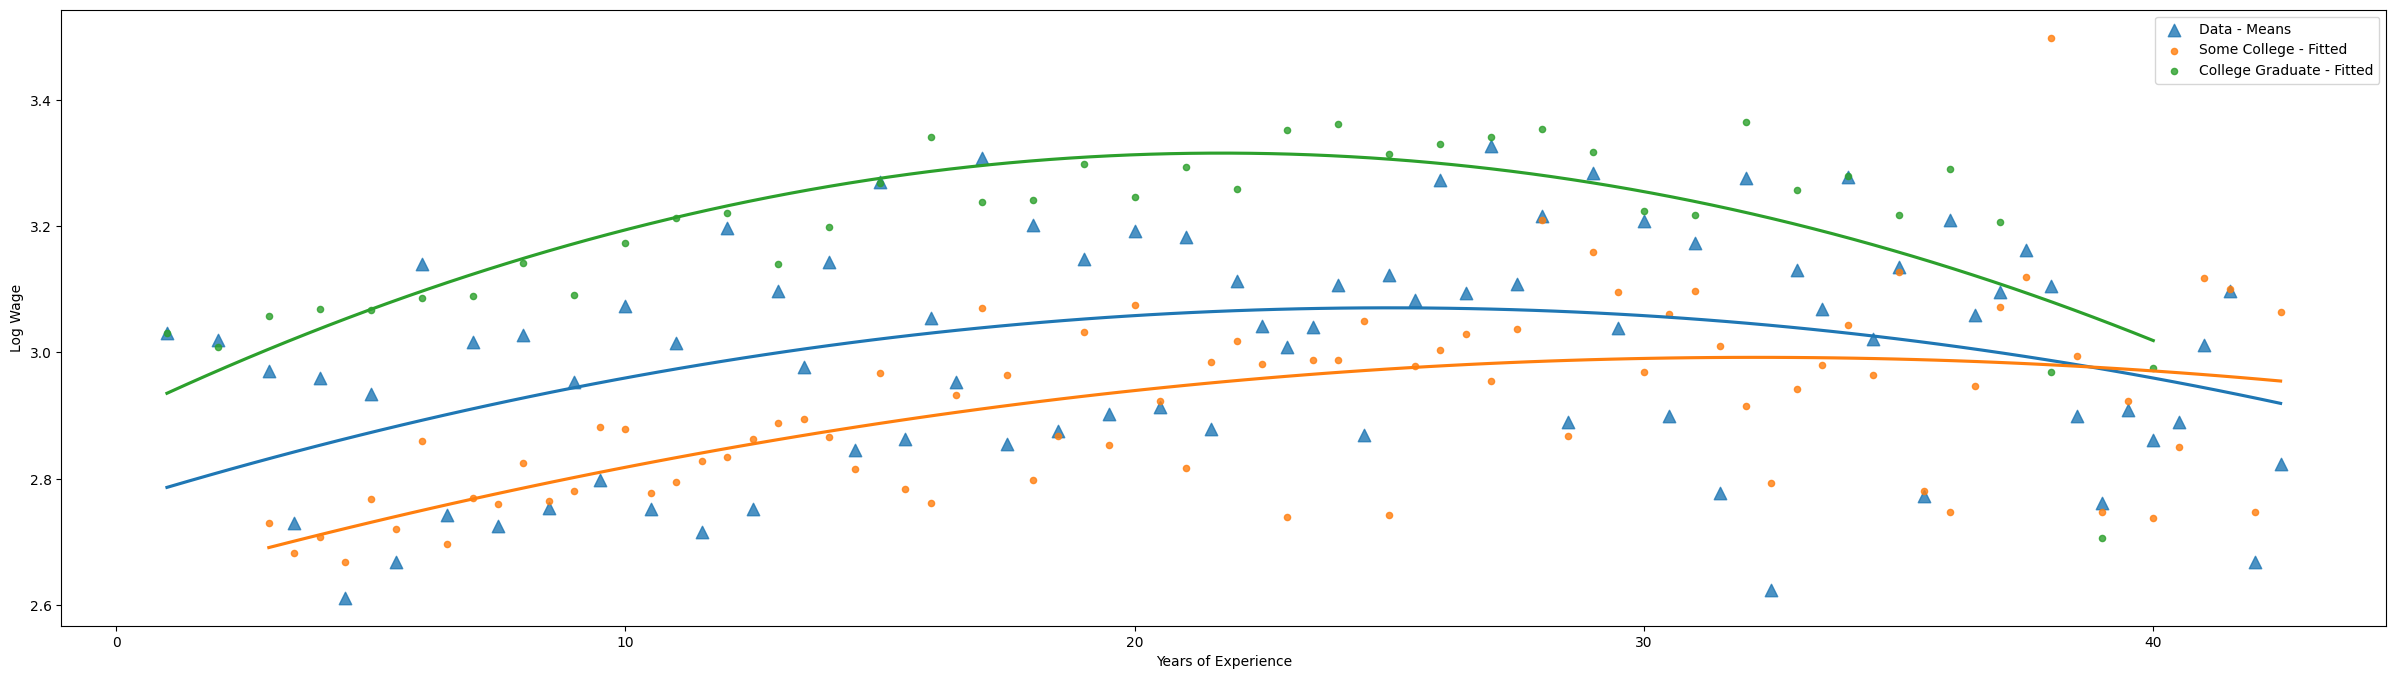

In [36]:
d_wage=data_graph.groupby('exp1', as_index=False)['lwage'].mean().sort_values('exp1')
d_scl=dncol.groupby('exp1', as_index=False)['result_control'].mean().sort_values('exp1')
d_clg=dcol.groupby('exp1', as_index=False)['result_control'].mean().sort_values('exp1')

sns.regplot(x=d_wage['exp1'], y=d_wage['lwage'], scatter_kws={"s": 80},order=2, ci=None, label='Data - Means',marker= '^')
sns.regplot(x=d_scl['exp1'], y=d_scl['result_control'], scatter_kws={"s": 80},order=2, ci=None, label='Some College - Fitted',marker= '.')
sns.regplot(x=d_clg['exp1'], y=d_clg['result_control'], scatter_kws={"s": 80},order=2, ci=None, label='College Graduate - Fitted',marker= '.')

plt.xlabel('Years of Experience')
plt.ylabel('Log Wage')
plt.legend(loc='best')
plt.show()